<a href="https://colab.research.google.com/github/shubhangighosh/Writing-technology-course-project/blob/main/writing_technology_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Installing required libraries

In [2]:
!pip install transformers #for pre-trained langauge model
!pip install mpld3 #for generating interactive plots

     |████████████████████████████████| 2.3MB 13.6MB/s 
     |████████████████████████████████| 3.3MB 24.2MB/s 
     |████████████████████████████████| 901kB 37.1MB/s 
     |████████████████████████████████| 890kB 11.9MB/s 
  Created wheel for mpld3: filename=mpld3-0.5.2-cp37-none-any.whl size=200644 sha256=8b1c5b411f90ca41c6d9b1760acf233a5007f7ac1c8682b3848f08ac128e7847
  Stored in directory: /root/.cache/pip/wheels/21/73/06/ea4b85609301850b1289a282852d92e22fcbf7a250ed5f547f
Successfully built mpld3


Importing libraries

In [10]:
import tensorflow as tf
from pathlib import Path
import transformers
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import os
import numpy as np
import mpld3
from google.colab import files
from sklearn.mixture import GaussianMixture
from scipy.stats import entropy
mpld3.enable_notebook()

Configuring GPU

In [5]:
gpu = tf.config.list_physical_devices('GPU')
print("Number of GPUs available: ", len(gpu))
if len(gpu) >  0:
    tf.config.experimental.set_memory_growth(gpu[0], True)

Number of GPUs available:  1


Setting Model and Data Paths

In [6]:
model_name  = 'bert_v13'
base_dir = Path('/content/drive/MyDrive/writing-technology-project/')
pretrained_dir = Path('/content/drive/MyDrive/writing-technology-project/tf-bert-large-uncased')
txt_files_dir = os.path.join(base_dir, 'txt-files')

Functions

Load Tokenizer

In [7]:
def load_tokenizer():
    print("Loading the saved pretrained tokenizer")
    tokenizer =  transformers.BertTokenizerFast.from_pretrained(pretrained_dir)
    model_config = transformers.BertConfig.from_pretrained(pretrained_dir)
    model_config.output_hidden_states = True
    return tokenizer, model_config

Load Language Model - BERT

In [8]:
def load_bert(config):
    print('loading the saved pretrained BERT model')
    bert_model = transformers.TFBertModel.from_pretrained(pretrained_dir, config = config)
    return bert_model

Visualise data

In [9]:
def visualise(given_str, vocab_list):
    curr_len = 0
    str_list = given_str.split(' ')
    inputs_list = []

    #Loading tokenizer and language model
    tokenizer, bert_config = load_tokenizer()
    model = load_bert(bert_config)

    #Tokenization
    
    while(curr_len < len(str_list)):
        input_str_list = str_list[curr_len:curr_len+512]
        input_str = " ".join(input_str_list)
        inputs = tokenizer(input_str, add_special_tokens=True, return_tensors="pt")
        inputs_list.extend(inputs["input_ids"][0].numpy())
        curr_len += 512

    #Get unique tokens
    ip_list_unique, counts = np.unique(inputs_list, return_counts=True)
    words = [vocab_list[i] for i in ip_list_unique]
    
    #Run model
    ip_list_unique = np.expand_dims(ip_list_unique, axis=0)
    outputs = model(ip_list_unique)

    #Embed high-dimensional output in two dimensions
    embedded = TSNE(random_state=42, n_components=2).fit_transform(outputs[0][0])

    #Generate interactive plot

    fig, ax = plt.subplots(figsize=(20,15))
    scatter = ax.scatter(embedded[:,0], embedded[:,1])
    tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=words)
    mpld3.plugins.connect(fig, tooltip)
    mpld3.save_html(fig, 'download_fig.html')
    files.download('download_fig.html')
    plt.show()

    return outputs[0][0], counts
    

Compute Entropy of Language distribution

In [15]:
def compute_entropy(counts):
    entropy_total = entropy(counts)*np.sum(counts)
    return entropy_total

Loading Vocabulary for annotation

In [11]:
vocab = open(os.path.join(pretrained_dir, 'vocab.txt'))
vocab_list = vocab.read().split('\n')
vocab.close()

Loading the original version of Edgar Allan Poe's The Gold-Bug

In [12]:
goldbug_original_file = open(os.path.join(txt_files_dir, 'gold-bug.txt'))
goldbug_original_str = goldbug_original_file.read()
goldbug_original_file.close()

Loading the Basic English version of Edgar Allan Poe's The Gold-Bug

In [13]:
goldbug_basic_file = open(os.path.join(txt_files_dir, 'gold-bug-basic.txt'))
goldbug_basic_str = goldbug_basic_file.read()
goldbug_basic_file.close()

Visualising the language model representation of the original version of The Gold-Bug

Loading the saved pretrained tokenizer
loading the saved pretrained BERT model


All model checkpoint layers were used when initializing TFBertModel.

All the layers of TFBertModel were initialized from the model checkpoint at /content/drive/MyDrive/writing-technology-project/tf-bert-large-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
Token indices sequence length is longer than the specified maximum sequence length for this model (519 > 512). Running this sequence through the model will result in indexing errors


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

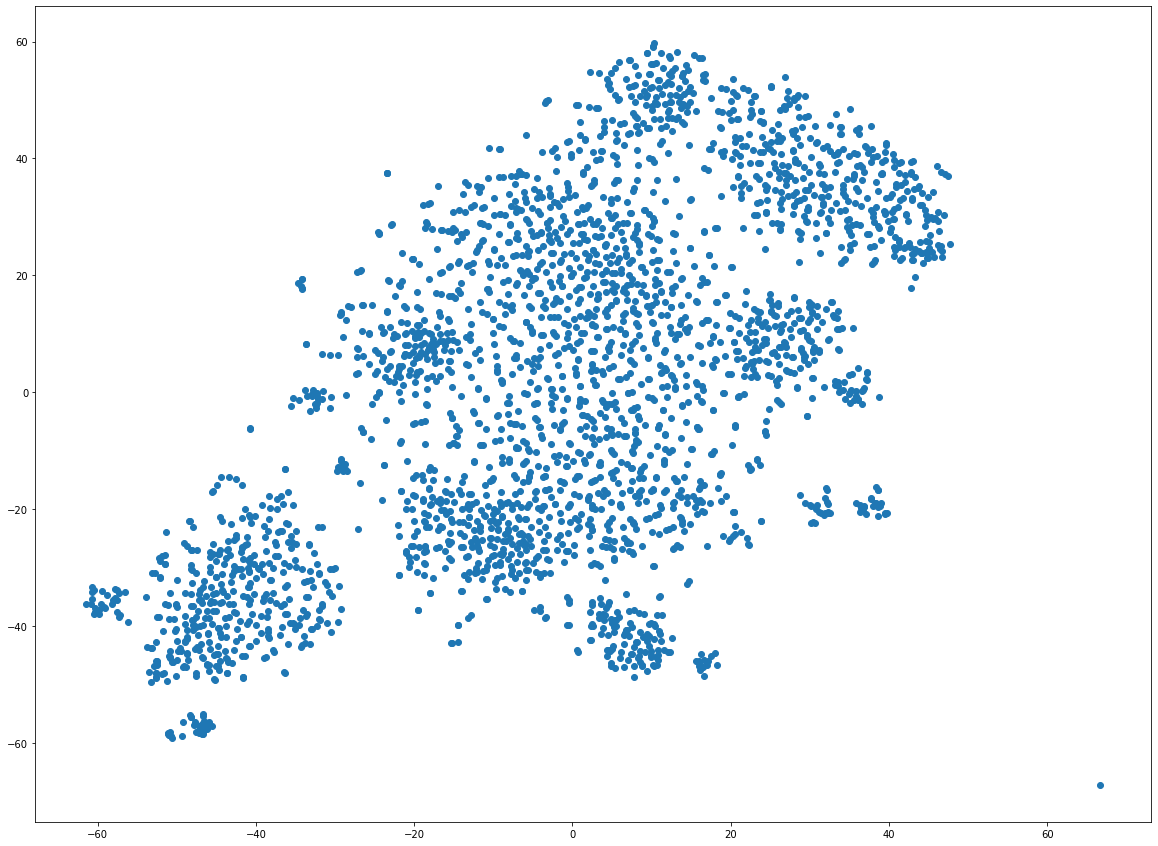

In [14]:
representations_original, counts_original = visualise(goldbug_original_str, vocab_list)

Computing the entropy of the language model representation of the original version of The Gold-Bug

In [19]:
print('Entropy, Original version, The Gold-Bug: ', entropy(counts_original))


Entropy, Original version, The Gold-Bug:  6.098840370765605


Visualising the language model representation of the Basic English version of The Gold-Bug

Loading the saved pretrained tokenizer
loading the saved pretrained BERT model


All model checkpoint layers were used when initializing TFBertModel.

All the layers of TFBertModel were initialized from the model checkpoint at /content/drive/MyDrive/writing-technology-project/tf-bert-large-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
Token indices sequence length is longer than the specified maximum sequence length for this model (599 > 512). Running this sequence through the model will result in indexing errors


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

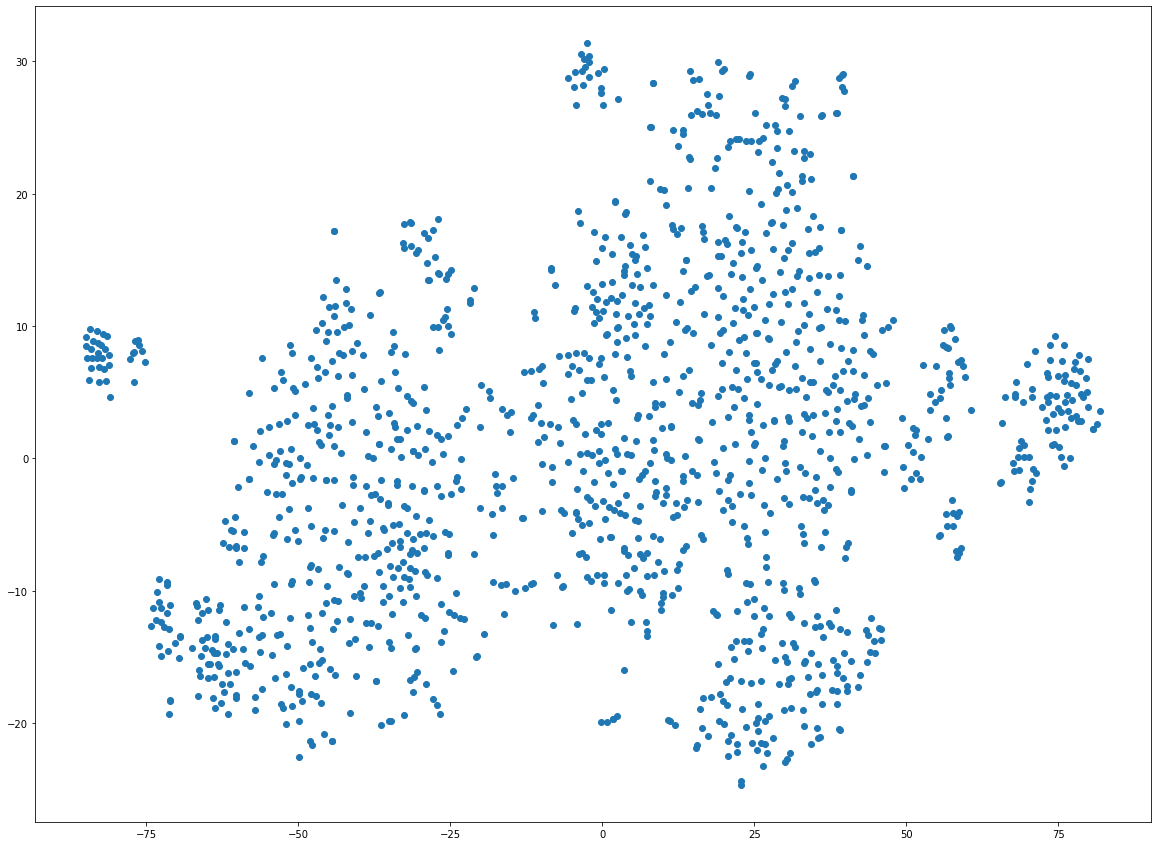

In [17]:
representations_basic, counts_basic = visualise(goldbug_basic_str, vocab_list)

Computing the entropy of the language model representation of the Basic English version of The Gold-Bug

In [20]:
print('Entropy, Basic English version, The Gold-Bug: ', entropy(counts_basic))

Entropy, Basic English version, The Gold-Bug:  5.552798672467239
